In [10]:
import pandas as pd
from  matplotlib import pyplot as plt

In [2]:
import random

In [3]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [11]:
len(L)

10000

In [12]:
L[:5]

[2, 10, 12, 6, 8]

In [13]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [14]:
import numpy as np
np.cumsum(s)

2     0.0291
3     0.0822
4     0.1628
5     0.2752
6     0.4159
7     0.5803
8     0.7256
9     0.8363
10    0.9192
11    0.9716
12    1.0000
Name: count, dtype: float64

<Axes: >

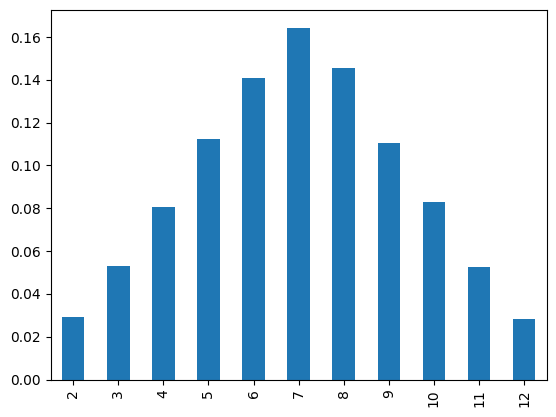

In [15]:
s.plot(kind='bar')

<AxesSubplot:>

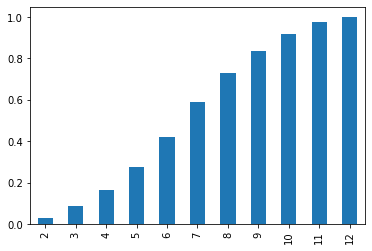

In [ ]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [25]:
sample.ndim

1

In [33]:
print(sample.max())
print(np.max(sample))

print(sample.min())
print(np.min(sample))

print(sample.std())
print(np.std(sample))


66.38582185598328
66.38582185598328
33.16106066520243
33.16106066520243
4.9612904682893015
4.9612904682893015


np.float64(66.38582185598328)

In [17]:
sample.mean()

np.float64(50.0128395956214)

(array([  7.,  19.,  56., 140., 255., 238., 193.,  78.,  10.,   4.]),
 array([33.16106067, 36.48353678, 39.8060129 , 43.12848902, 46.45096514,
        49.77344126, 53.09591738, 56.4183935 , 59.74086962, 63.06334574,
        66.38582186]),
 <BarContainer object of 10 artists>)

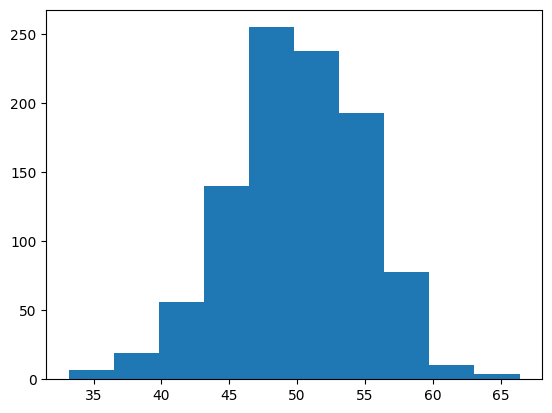

In [36]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [37]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [45]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean,sample_std)

In [46]:
values = np.linspace(sample.min(),sample.max(),100)

In [47]:
sample.max()

np.float64(66.38582185598328)

In [55]:
probabilities_density = [dist.pdf(value) for value in values]


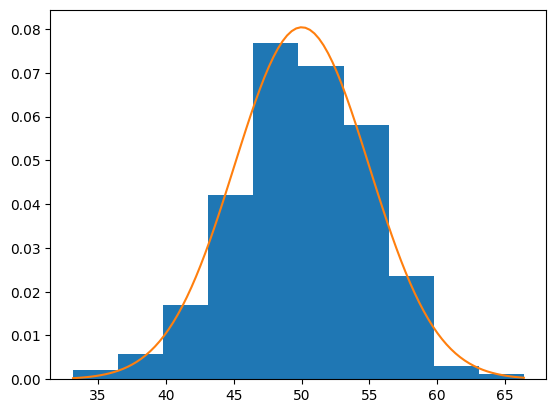

In [59]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities_density)

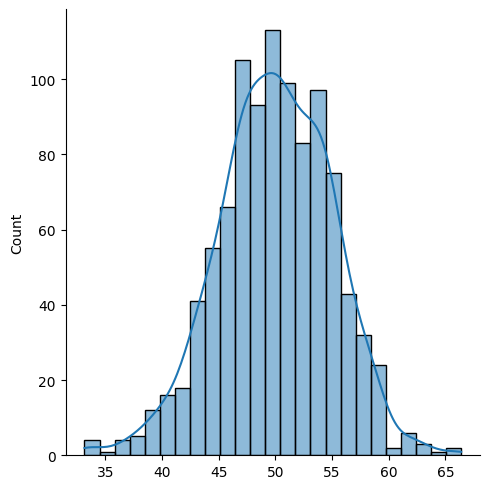

In [57]:
import seaborn as sns
sns.displot(sample, kde=True)

# KDE

In [66]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [67]:
len(sample)

1000

(array([ 2.,  0.,  0.,  0.,  1.,  2.,  4.,  1.,  7.,  8., 11., 21., 11.,
        22., 36., 24., 25., 23., 22., 18., 18., 17., 13., 15.,  5., 16.,
        14., 21., 27., 29., 38., 50., 50., 54., 62., 54., 59., 46., 50.,
        35., 23., 20., 17.,  8., 10.,  5.,  1.,  1.,  3.,  1.]),
 array([ 2.92881482,  3.9935723 ,  5.05832977,  6.12308725,  7.18784473,
         8.2526022 ,  9.31735968, 10.38211716, 11.44687463, 12.51163211,
        13.57638959, 14.64114706, 15.70590454, 16.77066202, 17.83541949,
        18.90017697, 19.96493445, 21.02969192, 22.0944494 , 23.15920688,
        24.22396435, 25.28872183, 26.35347931, 27.41823678, 28.48299426,
        29.54775174, 30.61250921, 31.67726669, 32.74202417, 33.80678164,
        34.87153912, 35.9362966 , 37.00105407, 38.06581155, 39.13056903,
        40.1953265 , 41.26008398, 42.32484146, 43.38959893, 44.45435641,
        45.51911389, 46.58387136, 47.64862884, 48.71338632, 49.77814379,
        50.84290127, 51.90765875, 52.97241622, 54.0371737 ,

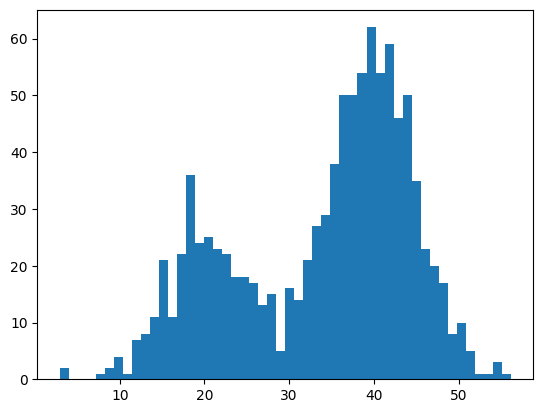

In [68]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [83]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=2, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=2)

In [84]:
sample.min()

np.float64(2.928814820027263)

In [85]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [86]:
probabilities_density = model.score_samples(values)
probabilities_density = np.exp(probabilities_density)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

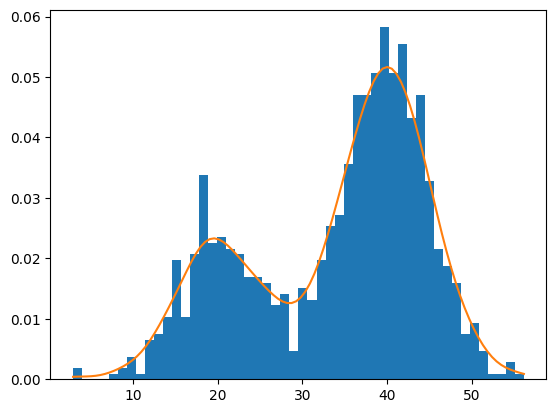

In [87]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities_density)
plt.show()

<Axes: ylabel='Density'>

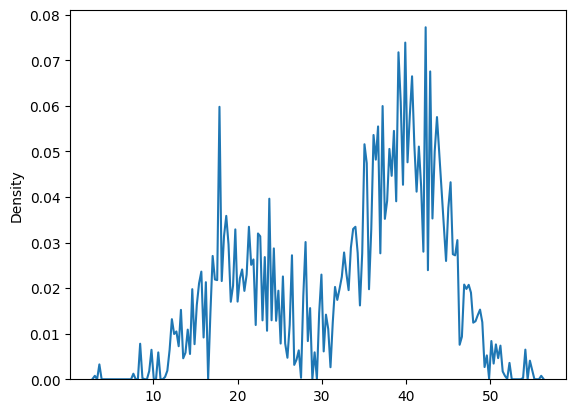

In [ ]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02) ##bw_adjust = bandwith(std)

In [79]:
import seaborn as sns

In [80]:
df = sns.load_dataset('iris')

In [81]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

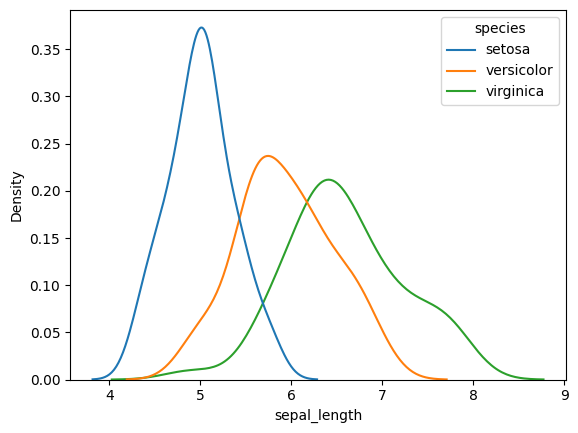

In [82]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

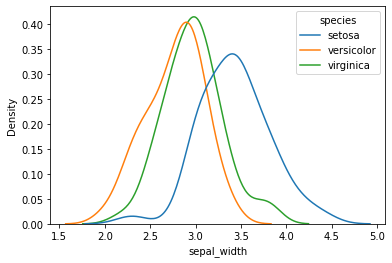

In [ ]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

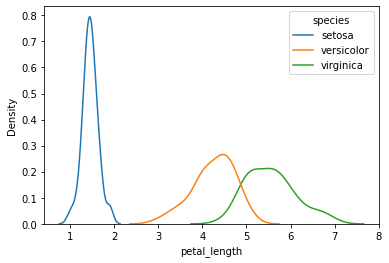

In [ ]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

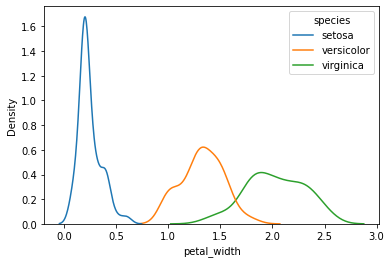

In [ ]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

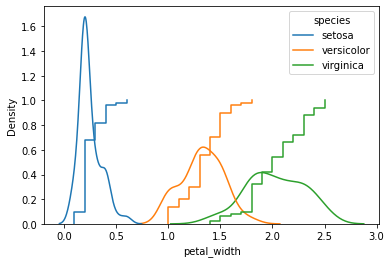

In [ ]:
sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

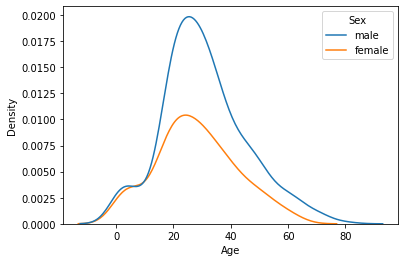

In [ ]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

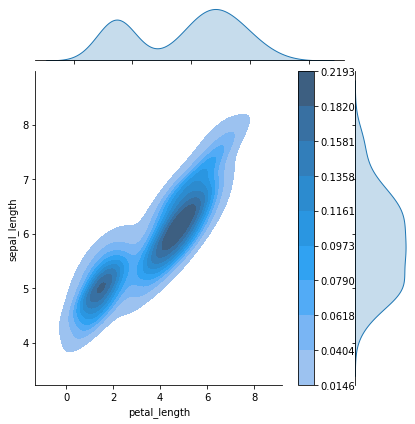

In [ ]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

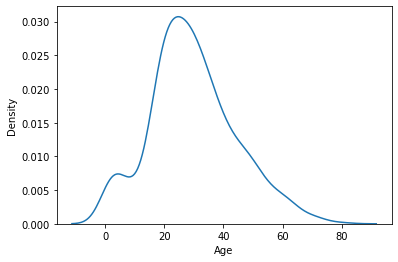

In [ ]:
sns.kdeplot(titanic['Age'])

In [ ]:
titanic['Age'].mean()

29.69911764705882

In [ ]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

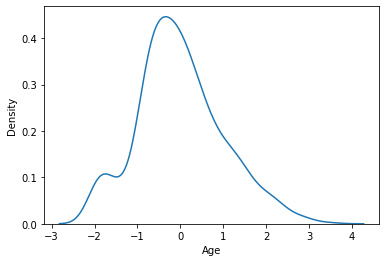

In [ ]:
sns.kdeplot(x)

In [ ]:
x.mean()

2.338621049070358e-16

In [ ]:
x.std()

1.0

In [ ]:
titanic['Age'].skew()

0.38910778230082704

In [ ]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [ ]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [ ]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [ ]:
titanic['Age'].max()

80.0